In [ ]:
!pip install -q -q -q geopandas
!pip install -q -q -q descartes
!pip install -q -q -q plotly

In [57]:
import pandas as pd
import geopandas as gpd
import shutil
from shapely.geometry import Point, LineString, shape

In [11]:
shutil.unpack_archive('shapefiles/CNTR_LB_2020_3857.shp.zip')
shutil.unpack_archive('shapefiles/CNTR_RG_60M_2020_3857.shp.zip')

In [14]:
countries = gpd.read_file('shapefiles/CNTR_RG_60M_2020_3857.shp')
centers =  gpd.read_file('shapefiles/CNTR_LB_2020_3857.shp')

In [42]:
flow = pd.read_csv('data/trade_2018.csv') #trade flow in 2018
codes = pd.read_csv('shapefiles/country_codes_V202001.csv', engine='python')
flow = flow.merge(codes[['country_code', 'iso_3digit_alpha']], left_on='i', right_on='country_code')
flow = flow.merge(codes[['country_code', 'iso_3digit_alpha']], left_on='j', right_on='country_code')
flow = flow.rename(columns={'iso_3digit_alpha_x': 'i_country', 'iso_3digit_alpha_y': 'j_country'})
flow = flow[['i_country', 'j_country', 'v', 'q']]

# carte de flux

In [49]:
centers['x'] = centers.geometry.x
centers['y'] = centers.geometry.y

In [50]:
centers

,CNTR_ID,CNTR_NAME,NAME_ENGL,ISO3_CODE,FID,geometry,x,y
0,AD,Andorra,Andorra,AND,AD,POINT (177153.332 5242543.294),1.771533e+05,5.242543e+06
1,AE,الإمارات العربية المتحدة,United Arab Emirates,ARE,AE,POINT (6009293.158 2688419.616),6.009293e+06,2.688420e+06
2,AF,افغانستان-افغانستان,Afghanistan,AFG,AF,POINT (7346852.946 4004370.954),7.346853e+06,4.004371e+06
3,AG,Antigua and Barbuda,Antigua and Barbuda,ATG,AG,POINT (-6880624.486 1929964.319),-6.880624e+06,1.929964e+06
4,AI,Anguilla,Anguilla,AIA,AI,POINT (-7017309.124 2063801.230),-7.017309e+06,2.063801e+06
...,...,...,...,...,...,...,...,...
252,SB,Solomon Islands,Solomon Islands,SLB,SB,POINT (17766679.730 -994699.510),1.776668e+07,-9.946995e+05
253,MH,Marshall Islands-Aorōkin M̧Ajeļ,Marshall Islands,MHL,MH,POINT (18760417.253 749906.113),1.876042e+07,7.499061e+05
254,MP,Northern Mariana Islands-Notte Mariånas-Northe...,Northern Mariana Islands,MNP,MP,POINT (16208588.407 1778629.044),1.620859e+07,1.778629e+06
255,SH,"Saint Helena, Ascension and Tristan Da Cunha","Saint Helena, Ascension and Tristan Da Cunha",SHN,SH,POINT (-1160780.595 -2931476.234),-1.160781e+06,-2.931476e+06


In [54]:
temp = flow.merge(centers[['ISO3_CODE', 'x', 'y']], left_on='i_country', right_on='ISO3_CODE')
temp = temp.merge(centers[['ISO3_CODE', 'x', 'y']], left_on='j_country', right_on='ISO3_CODE', suffixes=('_i', '_j'))

In [117]:
geometry = [LineString([[xy[0], xy[1]], [xy[2], xy[3]]]) for xy in zip(temp.x_i, temp.y_i, temp.x_j, temp.y_j)]
geometry = [xy[0].buffer(xy[1])  for xy in zip(geometry, temp.v/temp.v.max() * 200000 )]
geo_temp = gpd.GeoDataFrame(temp, geometry=geometry)

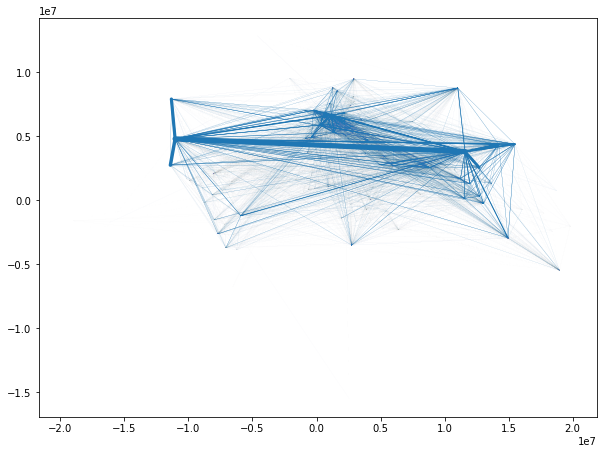

In [118]:
geo_temp.plot(figsize=(10,10))

(-22041243.086635, 22040949.340935, -8000000.0, 15000000.0)

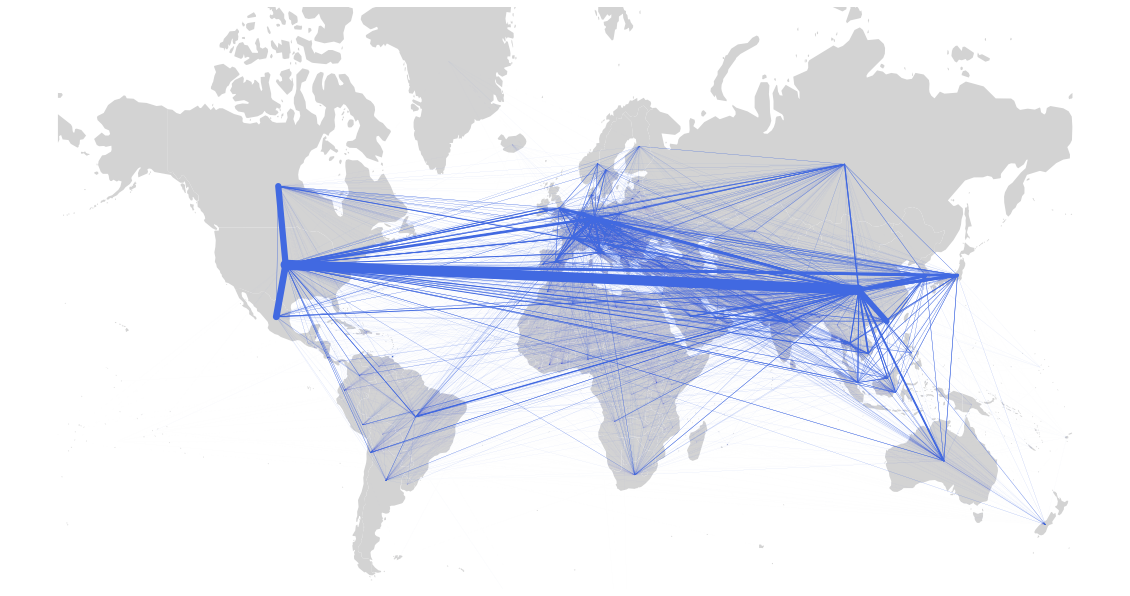

In [135]:
ax = countries.plot(figsize=(20,20), color="lightgray")
geo_temp.plot(color='royalblue', ax=ax)
#geo_temp[geo_temp.j_country=='FRA'].plot('v',ax=ax, cmap='OrRd')
#geo_temp.plot('v',ax=ax, cmap='OrRd')
ax.set_ylim((-8000000, 15000000))
ax.axis('off')
